In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
from tqdm import tqdm
from google.colab.patches import cv2_imshow

In [ ]:
os.chdir('drive/My Drive/sign_data')

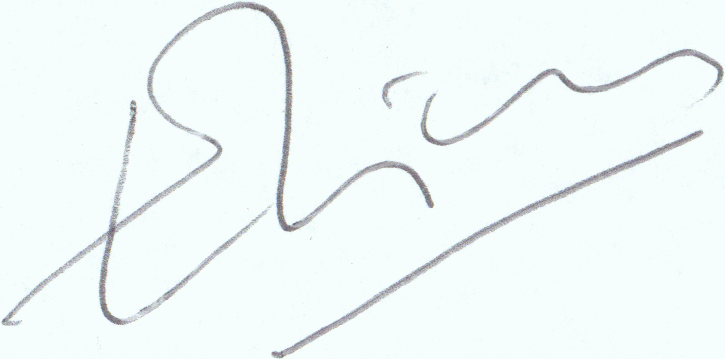

In [ ]:
img = cv2.imread('train/001/001_01.PNG')
cv2_imshow(img)

In [ ]:
img.shape

(359, 725, 3)

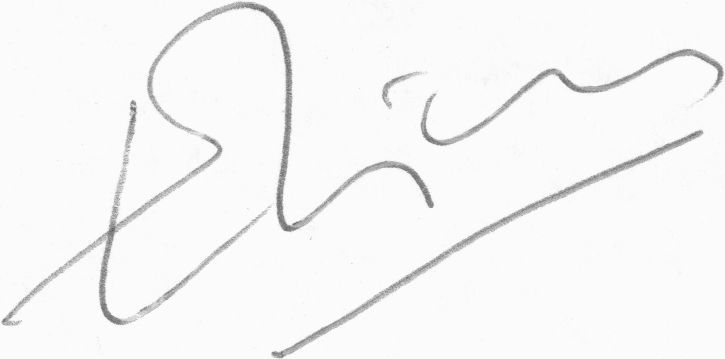

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

In [ ]:
img_gray.shape

(359, 725)

In [ ]:
height = []
width = []
for name in tqdm(os.listdir('train')):
    for image_name in os.listdir('train/'+name):
        img = cv2.imread('train/'+name+'/'+image_name)
        h, w, _ = img.shape
        height.append(h)
        width.append(w)

100%|██████████| 128/128 [15:01<00:00,  7.04s/it]


In [ ]:
mean_height = int(sum(height)/len(height))
mean_width = int(sum(width)/len(width))
print(mean_width, mean_height)

650 268


In [ ]:
os.mkdir('../signature_data_one_shot')
os.chdir('../signature_data_one_shot')
os.mkdir('train_data')
os.mkdir('validation_data')
os.mkdir('test_data')

In [ ]:
orig_images = []
forg_images = []
for name in tqdm(sorted(os.listdir('../sign_data/train'))):
    if 'forg' in name.lower():
        forg_images.append(len(os.listdir('../sign_data/train/'+name)))
    else:
        orig_images.append(len(os.listdir('../sign_data/train/'+name)))

100%|██████████| 128/128 [00:00<00:00, 1306.18it/s]


In [ ]:
num_orig = min(orig_images)
num_forg = min(forg_images)
print(num_orig, num_forg)

12 8


In [ ]:
tot_people = len(os.listdir('../sign_data/train'))//2
tot_people

64

In [ ]:
num_train = 100
num_validation = 14
num_test = 14
for name in tqdm(sorted(os.listdir('../sign_data/train'))):
    if num_train > 0:
        os.mkdir('train_data/'+name)
        if 'forg' in name.lower():
            i = num_forg
        else:
            i = num_orig
        for image_name in sorted(os.listdir('../sign_data/train/'+name)):
            if i <= 0:
                break
            img = cv2.imread('../sign_data/train/'+name+'/'+image_name)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_resized = cv2.resize(img_gray, (mean_width, mean_height))
            cv2.imwrite('train_data/'+name+'/'+image_name, img_resized)
            i -= 1
        num_train -= 1
    elif num_validation > 0:
        os.mkdir('validation_data/'+name)
        if 'forg' in name.lower():
            i = num_forg
        else:
            i = num_orig
        for image_name in sorted(os.listdir('../sign_data/train/'+name)):
            if i <= 0:
                break
            img = cv2.imread('../sign_data/train/'+name+'/'+image_name)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_resized = cv2.resize(img_gray, (mean_width, mean_height))
            cv2.imwrite('validation_data/'+name+'/'+image_name, img_resized)
            i -= 1
        num_validation -= 1
    elif num_test > 0:
        os.mkdir('test_data/'+name)
        if 'forg' in name.lower():
            i = num_forg
        else:
            i = num_orig
        for image_name in sorted(os.listdir('../sign_data/train/'+name)):
            if i <= 0:
                break
            img = cv2.imread('../sign_data/train/'+name+'/'+image_name)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_resized = cv2.resize(img_gray, (mean_width, mean_height))
            cv2.imwrite('test_data/'+name+'/'+image_name, img_resized)
            i -= 1
        num_test -= 1

100%|██████████| 128/128 [00:29<00:00,  4.34it/s]
